In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [95]:
total=pd.read_csv('C:/2nd_project/data_set/GY_export_import.csv')
total.drop(['Unnamed: 0'],axis=1, inplace=True) #불필요한 열 삭제
total.drop([0], inplace=True)

In [96]:
total_export=export[(total['import, export']=='export')] #전체에서 수출내역만
total_import=export[(total['import, export']=='import')] #전체에서 수입내역만

In [97]:
total_export_au=total_export[(total_export['Country']=='australia')] #전체 수출내역에서 특정나라만 추출
total_import_au=total_import[(total_import['Country']=='australia')] #전체 수출내역에서 특정나라만 추출

In [98]:
#슬라이싱을 위해 결측치 대체 및 형변환
total_export_au.fillna(0, inplace=True)
total_export_au['BEC']=total_export_au['BEC'].astype('int64')
total_export_au['BEC']=total_export_au['BEC'].astype(str) 

c:\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\user\AppData\Local\Temp/ipykernel_18544/3691807016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_export_au['BEC']=total_export_au['BEC'].astype('int64')
C:\Users\user\AppData\Local\Temp/ipykernel_18544/3691807016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [99]:
total_export_au_primary=total_export_au[total_export_au['BEC'].str[2:4] == '11'] #특정나라 수출내역에서 1차산품만 추출
total_export_au_primary=total_export_au_primary.groupby('Year').sum()
total_export_au_primary=total_export_au_primary.reset_index()

In [100]:
total_export_au_primary

,Year,USD
0,2012.0,146887069.0
1,2013.0,146902841.0
2,2014.0,143099873.0
3,2015.0,95452962.0
4,2016.0,92788094.0
5,2017.0,119415960.0
6,2018.0,125838746.0
7,2019.0,139083747.0
8,2020.0,135996769.0
9,2021.0,201650357.0


In [101]:
total_export_au['BEC']= total_export_au['BEC'].str.ljust(6, 'x')

C:\Users\user\AppData\Local\Temp/ipykernel_18544/413711155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_export_au['BEC']= total_export_au['BEC'].str.ljust(6, 'x')


In [102]:
#특정나라 수출내역에서 2차산품만 추출
#중간재만 찾기('12xx'를 찾을 때 반드시 str[2:] == '12xx'로!!!, str[2:4]=='12'로 하면 1210,1220도 포함되어버림!!!)
total_export_au_intermediate=total_export_au.loc[(total_export_au['BEC'].str[2:] == '12xx') | (total_export_au['BEC'].str[2:] == '1210') | (total_export_au['BEC'].str[2:] == '1220')]
total_export_au_intermediate=total_export_au_intermediate.groupby('Year').sum()
total_export_au_intermediate=total_export_au_intermediate.reset_index()

In [103]:
#특정나라 수출내역에서 3차산품만 추출
#최종재만 찾기('2xxx'를 찾을 때 반드시 str[2:] == '2xxx'로!!!, str[2]=='2'로 하면 2010,2020도 포함되어버림!!!!!!!!!!!!!!!!!!!!!! )
total_export_au_final=total_export_au.loc[(total_export_au['BEC'].str[2:] == '2xxx') | (total_export_au['BEC'].str[2:] == '2010') | (total_export_au['BEC'].str[2:] == '2020') | (total_export_au['BEC'].str[2:] == '3101') | (total_export_au['BEC'].str[2:] == '3102') | (total_export_au['BEC'].str[2:] == '3201') | (total_export_au['BEC'].str[2:] == '3202')]
total_export_au_final=total_export_au_final.groupby('Year').sum()
total_export_au_final=total_export_au_final.reset_index()

<AxesSubplot:xlabel='Year', ylabel='USD'>

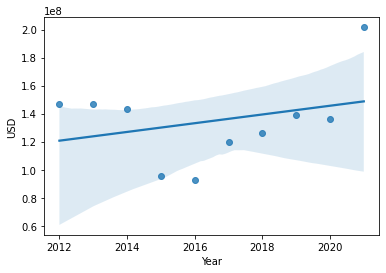

In [104]:
sns.regplot(x='Year', y='USD', data=total_export_au_primary)

<AxesSubplot:xlabel='Year', ylabel='USD'>

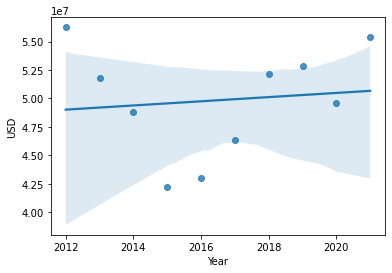

In [105]:
sns.regplot(x='Year', y='USD', data=total_export_au_intermediate)

<AxesSubplot:xlabel='Year', ylabel='USD'>

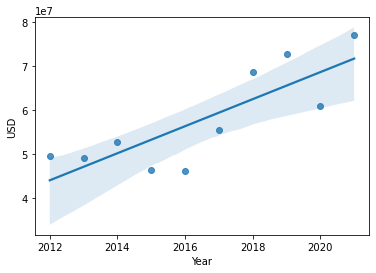

In [106]:
sns.regplot(x='Year', y='USD', data=total_export_au_final)

In [107]:
#단순선형회귀분석 https://velog.io/@skkumin/Linear-Regression-%EB%8B%A8%EC%88%9C-%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80-with-python
#1차산품 단순선형회귀분석
x=total_export_au_primary['Year']
target=total_export_au_primary['USD']
train_data=sm.add_constant(x, has_constant='add')
model1=sm.OLS(target, train_data)
fitted_model1=model1.fit()
fitted_model1.summary()

c:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    USD   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.8348
Date:                Wed, 06 Jul 2022   Prob (F-statistic):              0.388
Time:                        15:50:27   Log-Likelihood:                -185.56
No. Observations:                  10   AIC:                             375.1
Df Residuals:                       8   BIC:                             375.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.15e+09   6.88e+09     -0.894      0.397    -2.2e+10    9.71e+09
Year        3.117e+06   3.41e+06      0.914      0.388   -4.75e+06     1.1e+07
==============================================================================
Omnibus:                        0.365   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.445
Skew:                           0.317   Prob(JB):                        0.800
Kurtosis:                       2.183   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

결정계수 0.094 : 이 선형분석은 데이터를 설명하는데 적절하지 않고 p-value도 0.05보다 커서 유의하지 않음

In [108]:
#2차산품 단순선형회귀분석
x=total_export_au_intermediate['Year']
target=total_export_au_intermediate['USD']
train_data=sm.add_constant(x, has_constant='add')
model1=sm.OLS(target, train_data)
fitted_model1=model1.fit()
fitted_model1.summary()

c:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    USD   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                    0.1084
Date:                Wed, 06 Jul 2022   Prob (F-statistic):              0.750
Time:                        15:51:59   Log-Likelihood:                -167.45
No. Observations:                  10   AIC:                             338.9
Df Residuals:                       8   BIC:                             339.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.205e+08   1.12e+09     -0.285      0.783   -2.91e+09    2.27e+09
Year        1.836e+05   5.58e+05      0.329      0.750    -1.1e+06    1.47e+06
==============================================================================
Omnibus:                        0.441   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.500
Skew:                          -0.240   Prob(JB):                        0.779
Kurtosis:                       2.016   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
결정계수 0.013 : 이 선형분석은 데이터를 설명하는데 적절하지 않고 p-value도 0.05보다 커서 유의하지 않음

In [109]:
#3차산품 단순선형회귀분석
x=total_export_au_final['Year']
target=total_export_au_final['USD']
train_data=sm.add_constant(x, has_constant='add')
model1=sm.OLS(target, train_data)
fitted_model1=model1.fit()
fitted_model1.summary()

c:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    USD   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     16.15
Date:                Wed, 06 Jul 2022   Prob (F-statistic):            0.00385
Time:                        15:53:29   Log-Likelihood:                -170.60
No. Observations:                  10   AIC:                             345.2
Df Residuals:                       8   BIC:                             345.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.135e+09   1.54e+09     -3.981      0.004   -9.69e+09   -2.58e+09
Year        3.071e+06   7.64e+05      4.019      0.004    1.31e+06    4.83e+06
==============================================================================
Omnibus:                        3.089   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.178
Skew:                          -0.401   Prob(JB):                        0.555
Kurtosis:                       1.523   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
**********결정계수 0.669 : 이 선형분석은 데이터를 설명하는데 적절하지 않고 p-value도 0.05보다 작아서 유의함

In [117]:
#전년대비 수츨증감율
au_increase_primary=total_export_au_primary['USD'].pct_change()*100
au_increase_intermediate=total_export_au_intermediate['USD'].pct_change()*100
au_increase_final=total_export_au_final['USD'].pct_change()*100

In [118]:
au_increase_primary #1차 산품 수출금액 증가율

0          NaN
1     0.010738
2    -2.588764
3   -33.296264
4    -2.791813
5    28.697503
6     5.378499
7    10.525376
8    -2.219510
9    48.275844
Name: USD, dtype: float64

In [119]:
au_increase_intermediate #중간재 수출금액 증가율

0          NaN
1    -7.966262
2    -5.727661
3   -13.485818
4     1.809250
5     7.771519
6    12.534832
7     1.333192
8    -6.056296
9    11.565393
Name: USD, dtype: float64

In [120]:
au_increase_final #최종재 수출금액 증가율

0          NaN
1    -0.539633
2     7.140647
3   -12.172321
4    -0.215906
5    20.095138
6    23.600477
7     6.049640
8   -16.321141
9    26.706597
Name: USD, dtype: float64

In [ ]:
#ARIMA(Autoregressvie integrated MovingAverage)
#AR(자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황
#MA(이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(total_export_au_primary.USD.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

#오류!!!!!!!!!!!!!!!!

In [123]:
#https://incomeplus.tistory.com/247
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [124]:
#독립변수 X와 종속변수 Y로 분리
dataset=total_export_au_primary.values
X=dataset[:,2:].astype('float32')
Y=dataset[:,1].astype('float32')
# X=dataset[:,2:].astype('float32')
# Y=dataset[:,1].astype('float32')

In [125]:
#예측 테스트를 위해 train 데이터와 test 데이터로 나눔
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3)

In [126]:
#모델링 작업-Sequential()함수를 사용하여 모델층을 생성하고 은닉층에 노드수와 입력값, 활성화함수를 사용
model=Sequential()
model.add(Dense(30,input_dim=5, activation='relu'))
#수치예측시 relu()함수가 가장 많이 사용. 참거짓을 판단하거나 다항분류를 하는 모델에서는 sigmoid()함수나 softmax()함수를 사용
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

In [127]:
model.compile(loss='mean_squared_error', optimizer='RMSprop')
#adam을 최적화 함수로 사용해서 기울기(가중치)와 절편(편차)을 추정하면서 실제값에 가까운 예측모델을 만듬-예측치가 모두 nan으로 나옴
#RMSprop를 최적화 함수로 사용해서 기울기(가중치)와 절편(편차)을 추정하면서 실제값에 가까운 예측모델을 만듬-예측치가 모두 nan으로 나옴

In [129]:
#모델 학습 진행-학습을 1000번 반복하고 10개의 샘플데이터를 넣으면서 학습을 진행
model.fit(X_train, Y_train, epochs=1000)
오류!!!!!!!!!!!!!!!!!!!!!!!!!!!

Epoch 1/1000


ValueError: in user code:

    File "c:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\Anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "c:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 0)
